<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASES WITH DATA SCIENCE </h1> </center> <br>
<center> Business Case 3: Gift-a-Lot recommender system </center>

**Table of Contents** <br>
* [Group](#group)
* [Metadata](#metadata)
* [Expected Outcomes](#outcomes)
---------
* [1.0 Import](#import)
* [2.0 Data Understanding](#understanding)
* [3.0 Data Preparation](#preparation)
    * [3.1 Preparing Orders and Products Dataset](#orders)
    * [3.2 Preparing Customer Dataset](#customer)    
* [4.0 Data Modeling](#modeling)
    * [4.1 Clustering](#cluster) 
    * [4.2 Association Rules](#rules)
        * [4.2.1 Complementary Products](#complementary)
        * [4.2.2 Substitute Products](#subistitute)  
* [5.0 Deploy](#deploy)
    * [5.1 Often Bought Together](#together)
    * [5.2 You may also be interested in](#also)
    * [5.3 Based on your Location](#location)
    * [5.4 Based on your last purchase](#last)    
    * [5.5 Based on Similar Customers](#similar)
    * [5.6 Top products of the Month](#month)    

<hr>
<a class="anchor" id="group">
    
### Group
    
</a>

- Gabriel Felipe Martins de Souza   	|   m20210598 <br>
- Rogerio Domingos Paulo	        	|   m20210597 <br>
- Luiz Humberto Polaro Vizeu		    |   m20210554 <br>
- Celso Christiano Endres Neto		    |   m20200739 <br>

**References**
- https://github.com/deejayrusso/E-Commerce-Recommendations/blob/master/E-Commerce%20Recommendation%20Notebook.ipynb
- https://github.com/microsoft/recommenders/tree/main/examples/00_quick_start
- https://github.com/microsoft/recommenders/blob/main/examples/01_prepare_data/data_transform.ipynb
- https://towardsdatascience.com/an-easy-introduction-to-machine-learning-recommender-systems-efc8f7ece829
- https://www.geeksforgeeks.org/recommendation-system-in-python/
- https://towardsdatascience.com/the-frequently-bought-together-recommendation-system-b4ed076b24e5
- https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341
- https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/


<hr>
<a class="anchor" id="metadata">
    
### Metadata
    
</a>

| Name                        | Meaning                                                                                                                                                        |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo                   | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.    |
| StockCode                   | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.                                                            |
| Description                 | Product (item) name. Nominal.                                                                                                                                  |
| Quantity                    | The quantities of each product (item) per transaction. Numeric.                                                                                                |
| InvoiceDate                 | Invoice Date and time. Numeric, the day and time when each transaction was generated.                                                                          |
| UnitPrice                   | Unit price. Numeric, Product price per unit in pounds.                                                                                                         |
| CustomerID                  | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.                                                                        |
| Country                     | Country name. Nominal, the name of the country where each customer resides.                

<hr>
<a class="anchor" id="outcomes">
    
### Expected Outcomes
    
</a>

1. Explore the data and build models to answer the problems:
    1. Market Basket Analysis: Which types of products can be seen as
       substitutes and complementary?  What are the **main types of consumer
       behavior** in the business?
    2. Recommender system: the website homepage offers a wide range of
       products the user might be interested in
    3. Cold start: offer relevant products to **new customers**
2. Implement adequate evaluation strategies and select an appropriate **quality
   measure**
3. In the deployment phase, elaborate on the challenges and **recommendations** in
   implementing the recommender system

<hr>
<a class="anchor" id="import">
    
# 1.0 Import
    
</a>

In [1]:
#common packages
import pandas as pd
import numpy as np
import scipy as sp
from math import ceil, pi
import os
from itertools import product
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from datetime import time

#dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
sns.set()
import graphviz
import matplotlib.cm as cm
import matplotlib.cm as cm
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
#!pip install networkx
import networkx as nx


#algorithms for data preparation and preprocessing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from datetime import datetime
from scipy import stats

#clustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# !pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

#pandas sql
# !pip install pandasql
import pandasql as ps
from pandasql import sqldf

In [2]:
#loading the file using pandas
df = pd.read_csv('retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<hr>
<a class="anchor" id="understanding">
    
# 2.0 Data Understanding
    
</a>

In [3]:
#general info about the dataset
df.info()

'''InvoiceDate and CustomerID data types should be converted to Date and Object respectively'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


'InvoiceDate and CustomerID data types should be converted to Date and Object respectively'

In [4]:
#describing the numerical features
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#describing the categorical features
df.describe(include =['O'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [6]:
#shows the number os null observations
'''Missing values in Description and CustomerID'''
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#checking the presence of null customer_id
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [8]:
#checking the amount of unique invoices/transactions and the amount of items within them
df.groupby(['InvoiceNo'])['StockCode'].nunique().sort_values(ascending=False)

InvoiceNo
573585     1110
581219      749
581492      731
580729      721
558475      704
           ... 
540452        1
580976        1
580975        1
573881        1
C543640       1
Name: StockCode, Length: 25900, dtype: int64

In [9]:
#checking the amount of unique invoices/transactions and the amount of Customers within them
df.groupby(['InvoiceNo'])['CustomerID'].nunique().sort_values(ascending=True)

InvoiceNo
559042     0
561326     0
550123     0
542156     0
574094     0
          ..
556066     1
556065     1
556064     1
556062     1
C581569    1
Name: CustomerID, Length: 25900, dtype: int64

In [10]:
#checking the amount of Unique Customers and the total of transactions made by them
df.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
          ... 
13877.0      1
16400.0      1
13878.0      1
13886.0      1
13670.0      1
Name: InvoiceNo, Length: 4372, dtype: int64

In [11]:
#checking the total of cancelled transactions 
cancelled_invoices = df['InvoiceNo'].str.contains("C")

#total of cancelled transactions ~9,2K
cancelled_invoices.value_counts()

False    532621
True       9288
Name: InvoiceNo, dtype: int64

In [12]:
#checking five cancelled transactions
df[df['InvoiceNo'].str.contains("C")].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


<div class="alert alert-block alert-success">
    
__Notes__: <br>
    - There are 8 features and 541909 raw observations in the dataset;<br>
    - 25900 unique transactions (InvoiceNo) along 38 different countries;<br>
    - 4070 unique items (StockCode);<br>
    - Multiple items per invoice (max. 1110 items for the transaction InvoiceNo = 573585);<br>
    - Multiple transactions per customers;<br>
    - 9288 cancelled transactions/InvoiceNo (whenever InvoiceNo starts with "C");<br>
    - InvoiceDate and CustomerID data types should be converted to Date and Object respectively;<br>
    - Missing values in Description and CustomerID;<br>
    
</div>

<hr>
<a class="anchor" id="preparation">
    
# 3.0 Data Preparation
    
</a>

**In this step, several data preparation  methods will be applied, in order to generate different datasets towards the different problems, such as: Association Rules, Clustering and generic Queries.**

<hr>
<a class="anchor" id="orders">
    
## 3.1 Preparing Orders and Products Datasets
    
</a>

*Creating a copy of the original dataset*

In [13]:
df_prep1 = df.copy()

*Removing Cancelled Transactions*

In [14]:
df_prep1.shape

(541909, 8)

In [15]:
#selecting only completed transactions (not cancelled)
df_completed_transacions = df_prep1[~df_prep1['InvoiceNo'].str.contains("C")].copy()
df_completed_transacions.shape

(532621, 8)

*Reassigning the df_prep and checking the info() for general information about the dataset*

In [16]:
df_prep1 = df_completed_transacions.copy()
df_prep1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

*As for the purpose of the recommendation, we need the descriptions of all the products in order to give a recommendation that can make sense, so we are going to remove all the transactions in which the descriptions are missing*

In [17]:
df_full_description = df_prep1[~df_prep1['Description'].isnull()]
df_full_description.shape

(531167, 8)

In [18]:
#reassigning the cleaned dataset to df_prep1
df_prep1 = df_full_description.copy()
df_prep1.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133243
Country             0
dtype: int64

*Some of the StockCode values are integers, and some are strings - Then we are going to use a function to guarantee the StockCode to be always string*

In [19]:
# Using '_' in stockcode to always be a string
df_prep1['StockCode'] = df_prep1['StockCode'].apply(lambda x: '_'+str(x))
df_prep1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,_85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,_71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,_84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,_84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,_84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


*Creating Orders dataframe to create the recommendations and the Products dataframe to retrieve the outputs*

In [20]:
# DataFrame for building the recommendation system
orders = df_prep1[['InvoiceNo', 'StockCode']].copy()
orders.head()

,InvoiceNo,StockCode
0,536365,_85123A
1,536365,_71053
2,536365,_84406B
3,536365,_84029G
4,536365,_84029E


In [21]:
# DataFrame for retrieving product descriptions
products = df_prep1[['StockCode', 'Description']].copy()
products.head()

,StockCode,Description
0,_85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,_71053,WHITE METAL LANTERN
2,_84406B,CREAM CUPID HEARTS COAT HANGER
3,_84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,_84029E,RED WOOLLY HOTTIE WHITE HEART.


In [22]:
#checking out the shape of the two dataframes created
print(products.shape)
print(orders.shape)

(531167, 2)
(531167, 2)


*Converting the StockCode values to upper case*

In [23]:
# Convert StockCode to uppercase
products['StockCode'] = products['StockCode'].str.upper()

*Removing duplicate rows from the products DataFrame*

In [24]:
# Drop duplicated products
products = products[~products.duplicated()]
products.head()

,StockCode,Description
0,_85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,_71053,WHITE METAL LANTERN
2,_84406B,CREAM CUPID HEARTS COAT HANGER
3,_84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,_84029E,RED WOOLLY HOTTIE WHITE HEART.


In [25]:
#checking out the shape of the two dataframes created
print("Products Dataset Shape is:",products.shape)
print("Orders Dataset Shape is:",orders.shape)

Products Dataset Shape is: (4661, 2)
Orders Dataset Shape is: (531167, 2)


*Descriptions in lower case seems to be noise*

In [26]:
products[products['StockCode'] == '_23090']

,StockCode,Description
190711,_23090,VINTAGE GLASS T-LIGHT HOLDER
536908,_23090,missing


*Removing the observations on which the Description appears as lowercase*

In [27]:
# Drop descriptions that are not uppercase
products = products[
    products['Description'].str.upper() == products['Description']
]

In [28]:
#checking if the description in lowercase still persists
products[products['StockCode'] == '_23090']

,StockCode,Description
190711,_23090,VINTAGE GLASS T-LIGHT HOLDER


*Checking the total of descriptions for the same StockCode (duplicates)*

In [29]:
products.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

StockCode
_23236    4
_23131    4
_23196    4
_22812    3
_23203    3
         ..
_22408    1
_22409    1
_22410    1
_22411    1
_S        1
Name: Description, Length: 3782, dtype: int64

*Removing the duplicates for the descriptions*

In [30]:
# Keep only the first Description of each product
products = products[~products.duplicated(subset=['StockCode'])].copy()
products.head()

,StockCode,Description
0,_85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,_71053,WHITE METAL LANTERN
2,_84406B,CREAM CUPID HEARTS COAT HANGER
3,_84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,_84029E,RED WOOLLY HOTTIE WHITE HEART.


In [31]:
#checking after removing the duplicates
products.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

StockCode
_10002    1
_35965    1
_35920    1
_35921    1
_35922    1
         ..
_22390    1
_22391    1
_22393    1
_22394    1
_S        1
Name: Description, Length: 3782, dtype: int64

*Replacing the index of the dataframe Products to StockCode*

In [32]:
# Set the index to StockCode
products = products.set_index('StockCode')

# Convert to Series to ease the querys
products = products['Description']

In [33]:
# Testing the query
products['_71053']

'WHITE METAL LANTERN'

*Using group by to assign a list of items (StockCode) into each InvoiceNo*

In [34]:
def string_list(x):
    return [str(i) for i in x]

orders = orders.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()
orders.head()

,InvoiceNo,StockCode
0,536365,"[_85123A, _71053, _84406B, _84029G, _84029E, _..."
1,536366,"[_22633, _22632]"
2,536367,"[_84879, _22745, _22748, _22749, _22310, _8496..."
3,536368,"[_22960, _22913, _22912, _22914]"
4,536369,[_21756]


In [35]:
#checking general information about Products dataset
print("shape", products.shape)
print("missing values", products.isnull().sum())
print(products.dtypes)
products.head(2)

shape (3782,)
missing values 0
object


StockCode
_85123A    WHITE HANGING HEART T-LIGHT HOLDER
_71053                    WHITE METAL LANTERN
Name: Description, dtype: object

In [36]:
products.head()

StockCode
_85123A     WHITE HANGING HEART T-LIGHT HOLDER
_71053                     WHITE METAL LANTERN
_84406B         CREAM CUPID HEARTS COAT HANGER
_84029G    KNITTED UNION FLAG HOT WATER BOTTLE
_84029E         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [37]:
#checking general information about Orders dataset
print("shape", orders.shape)
print("missing values", orders.isnull().sum())
print(orders.dtypes)
orders.head(2)

shape (20610, 2)
missing values InvoiceNo    0
StockCode    0
dtype: int64
InvoiceNo    object
StockCode    object
dtype: object


,InvoiceNo,StockCode
0,536365,"[_85123A, _71053, _84406B, _84029G, _84029E, _..."
1,536366,"[_22633, _22632]"


<hr>
<a class="anchor" id="customer">
    
## 3.2 Preparing Customer Dataset
    
</a>

*creating a new dataframe from the original to store customer features*

In [38]:
#copying the prior dataframe to a new df_cust
df_cust = df.copy()
df_cust.shape

(541909, 8)

In [39]:
#removing the rows on which the item descriptions are null
df_cust = df_cust[~df_cust['Description'].isnull()]
df_cust.shape

(540455, 8)

In [40]:
#changing the datatype of customer_id from numeric to string
df_cust['CustomerID'] = df_cust['CustomerID'].apply(str)
df_cust['CustomerID'].dtypes

dtype('O')

*Adjusting the column InvoiceDate from string to datetime*

In [41]:
#splits the column "invoiceData" in two new columns to store date and time separatelly
datesplit = df_cust['InvoiceDate'].str.split(" ",n=1, expand=True)[0]
timesplit = df_cust['InvoiceDate'].str.split(" ",n=1, expand=True)[1]

#storing year, month and day in separate instances
y = datesplit.str.split("/",n=2, expand=True)[2]
m = datesplit.str.split("/",n=2, expand=True)[1]
d = datesplit.str.split("/",n=2, expand=True)[0]

#creating a new variable "date" by merging the year, month, day and hour
order_date = y+"-"+d+"-"+m+" "+timesplit
df_cust['order_date'] = order_date

#converting the new column "date" to a datetime
df_cust['order_date'] = pd.to_datetime(df_cust['order_date'])

#drops the formem column "InvoiceDate"
df_cust.drop(columns = 'InvoiceDate', inplace=True)

#checking the data type convertion
df_cust.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
CustomerID             object
Country                object
order_date     datetime64[ns]
dtype: object

In [42]:
#creating a new column "month" to store the month when the purchase has been done
df_cust['month'] = df_cust['order_date'].dt.strftime('%Y-%m')

In [43]:
#creating a new column to identify the cancelled transactions
df_cust['order_status'] = ~df_cust['InvoiceNo'].str.contains("C")

In [44]:
#removing the rows on which customer_id is null
df_cust = df_cust[~df_cust['CustomerID'].isnull()]
df_cust.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
CustomerID      0
Country         0
order_date      0
month           0
order_status    0
dtype: int64

*Using Pandas SQL to facilitate the dataset structuing*

In [45]:
#lambda function to facilitate the queries along global variables
pysqldf = lambda q: sqldf(q, globals())

In [46]:
#creating customer_table
q = """SELECT
        CustomerID,
        MAX(Country) AS Country,
        COUNT(distinct CASE WHEN order_status is true then InvoiceNo END) AS frequency,
       --ROUND (COUNT(distinct CASE WHEN order_status is false then InvoiceNo END) / COUNT(distinct InvoiceNo),2) AS cancellation_rate,
        ROUND(SUM((CASE WHEN order_status is true then Quantity END)*(CASE WHEN order_status is true then UnitPrice END)),2) AS monetary,
        COUNT(distinct CASE WHEN order_status is true then StockCode END) distinct_items,
        ROUND(SUM(CASE WHEN order_status is true then Quantity END)/COUNT(distinct CASE WHEN order_status is true then InvoiceNo END),2) AS items_per_transaction,
        ROUND((SUM((CASE WHEN order_status is true then Quantity END)*(CASE WHEN order_status is true then UnitPrice END)))/COUNT(distinct CASE WHEN order_status is true then InvoiceNo END),2) AS avg_ticket

        FROM df_cust
        WHERE CustomerID is not null
            AND CustomerID != 'nan'
            AND order_status is true
        GROUP BY CustomerID;"""
customer_table = pysqldf(q)

In [47]:
# #creating cust_order_rank
# q = """SELECT
#         CustomerID,
#         StockCode,
#         freq,
#         RANK() OVER(PARTITION BY CustomerID ORDER BY freq DESC) AS rank
        
#         FROM cust_items_frq
#         GROUP BY CustomerID, StockCode
#         ORDER BY CustomerID, rank
#         ;"""
# cust_items_rank = pysqldf(q)
# cust_items_rank

In [48]:
#checking the new dataframe customer_table
customer_table.head()

,CustomerID,Country,frequency,monetary,distinct_items,items_per_transaction,avg_ticket
0,12346.0,United Kingdom,1,77183.60,1,74215.0,77183.60
1,12347.0,Iceland,7,4310.00,103,351.0,615.71
2,12348.0,Finland,4,1797.24,22,585.0,449.31
3,12349.0,Italy,1,1757.55,73,631.0,1757.55
4,12350.0,Norway,1,334.40,17,197.0,334.40


In [49]:
#Defining metric and non-metric features. 
non_metric_list = ['CustomerID','Country']
metric_feat = customer_table.columns.drop(non_metric_list).to_list()
non_metric_feat = ['CustomerID','Country']

*Frequency of Customers per Country*

<AxesSubplot:title={'center':'Total Customers By Country'}, xlabel='Country'>

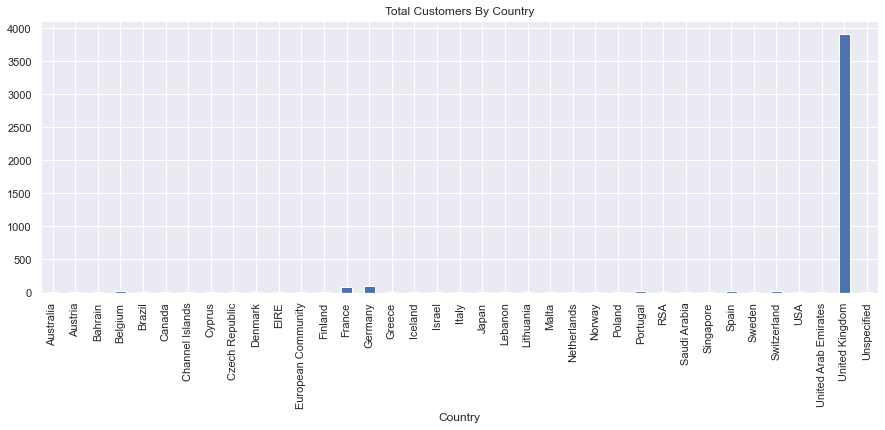

In [50]:
#Frequency of Customers per Country
country_cardinality = customer_table.groupby('Country')['CustomerID'].count()
country_cardinality.plot(kind = 'bar',figsize = (15,5), title = 'Total Customers By Country', sharex = False)

*Analyzing the purchases over time*

<AxesSubplot:title={'center':'Purchases Per Month'}, xlabel='order_date'>

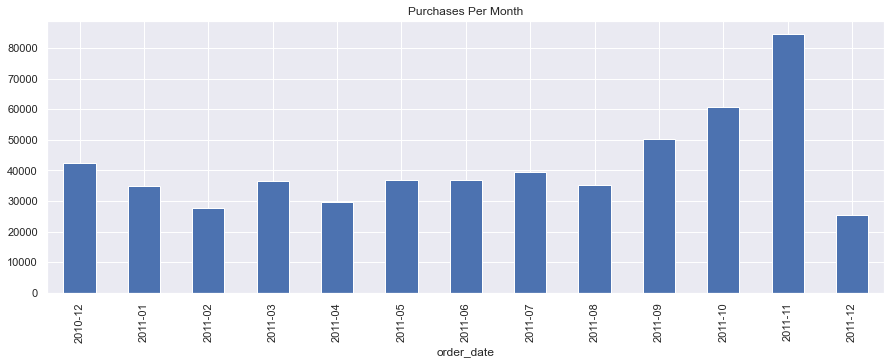

In [51]:
count = df_cust.groupby(df_cust['order_date'].dt.strftime('%Y-%m'))['InvoiceNo'].count()

count.plot(kind = 'bar',figsize = (15,5), title = 'Purchases Per Month', sharex = False)

**Metric Features Boxplot**

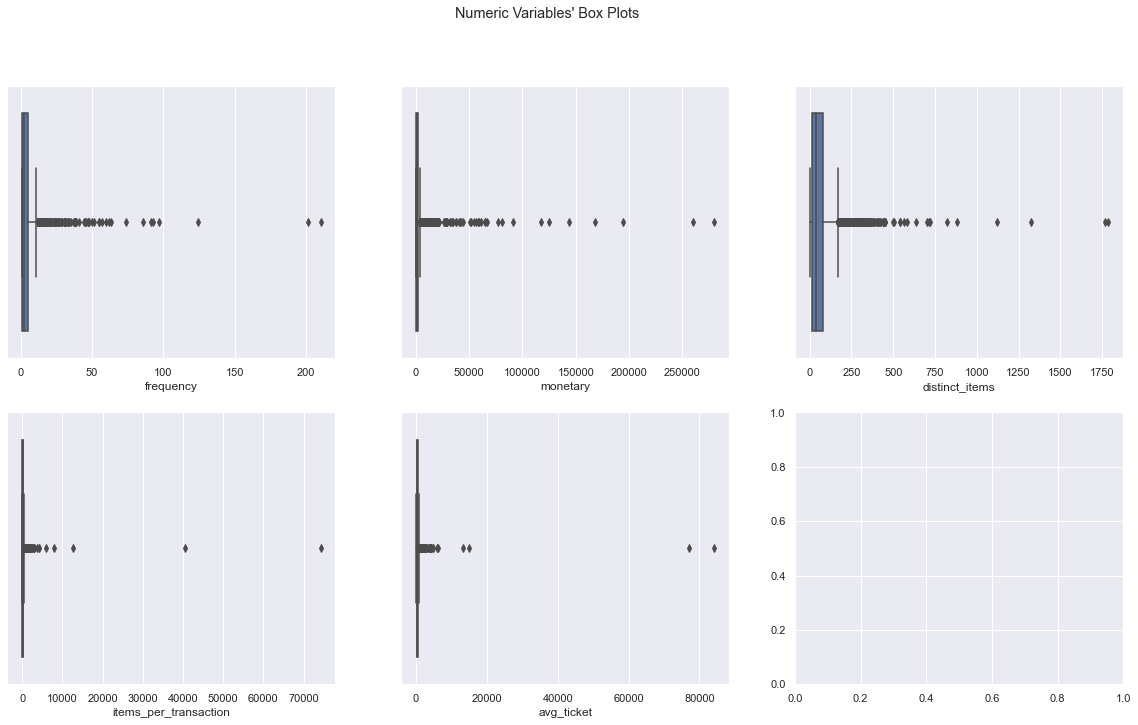

In [52]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_feat): # Notice the zip() function and flatten() method
    sns.boxplot(x=customer_table[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


*Filtering Outliers Manually*

In [53]:
#creating a copy of the dataframe to filter the outliers manually
df_cleaned = customer_table.copy()

In [54]:
df_cleaned.columns

Index(['CustomerID', 'Country', 'frequency', 'monetary', 'distinct_items',
       'items_per_transaction', 'avg_ticket'],
      dtype='object')

In [55]:
#adjusting the outliers observations defining the best thresholds on each variable

df_cleaned.loc[df_cleaned['frequency'] > 40, 'frequency'] = 40

df_cleaned.loc[df_cleaned['monetary'] > 25000, 'monetary'] = 25000

df_cleaned.loc[df_cleaned['distinct_items'] > 450, 'distinct_items'] = 450

df_cleaned.loc[df_cleaned['items_per_transaction'] > 2500, 'items_per_transaction'] = 2500

df_cleaned.loc[df_cleaned['avg_ticket'] > 2500, 'avg_ticket'] = 2500

print('Percentage of data kept after removing outliers:', np.round(df_cleaned.shape[0] / customer_table.shape[0], 4))

Percentage of data kept after removing outliers: 1.0


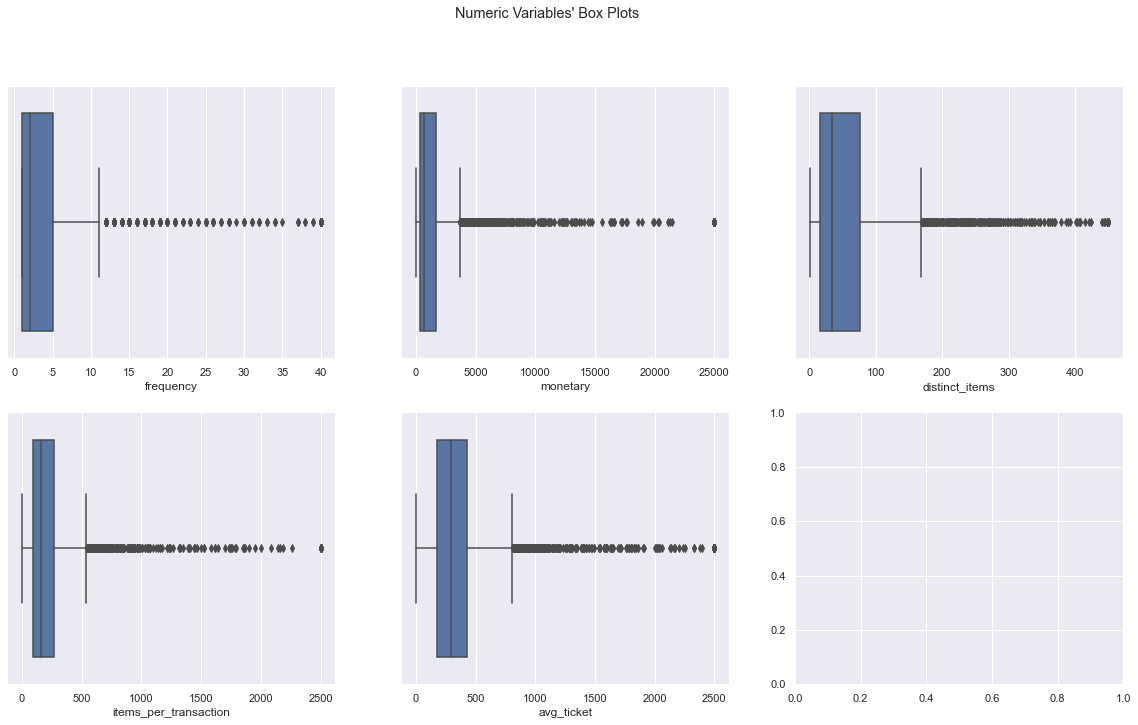

In [56]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_feat): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_cleaned[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

**Metric Features Histogram**

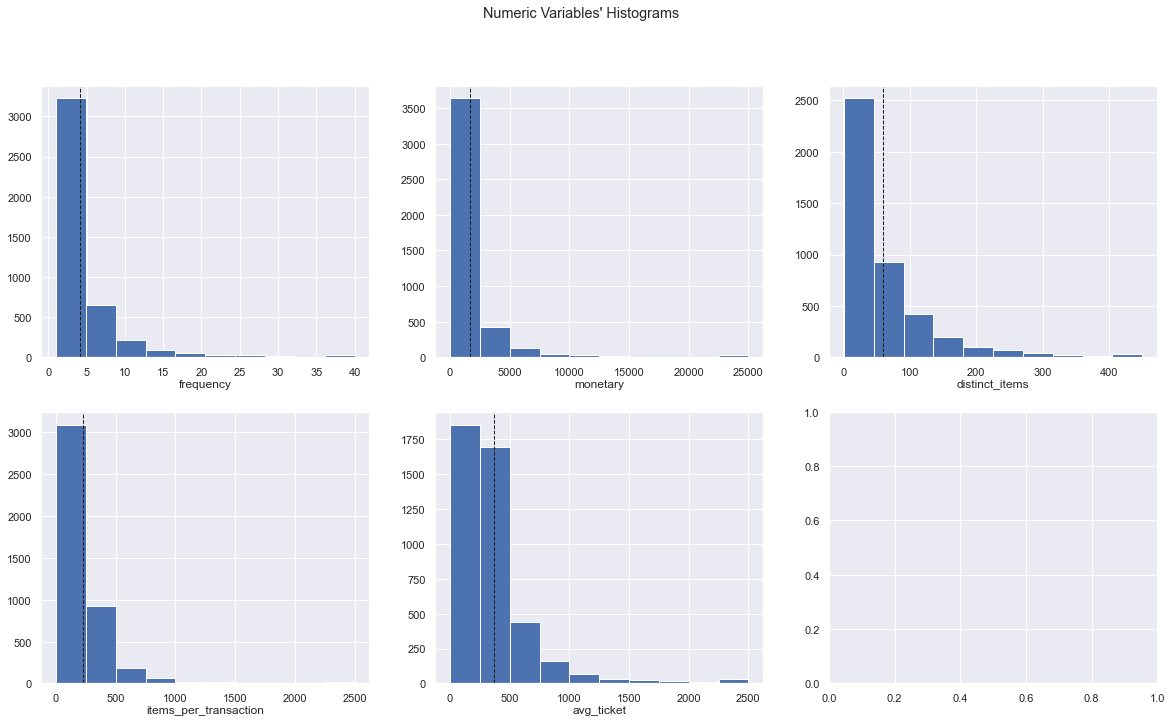

In [57]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_feat): # Notice the zip() function and flatten() method
    ax.hist(df_cleaned[feat])
    ax.set_title(feat, y=-0.13)
    ax.axvline(df_cleaned[feat].mean(), color='k', linestyle='dashed', linewidth=1)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

**Metric Features Correlation Matrix - Pearson**

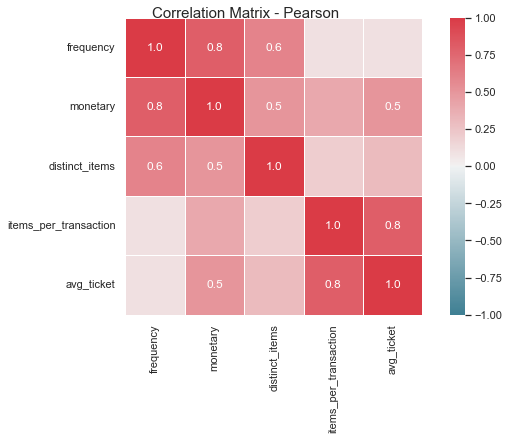

In [58]:
# Prepare figure
fig = plt.figure(figsize=(10, 5))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_cleaned.corr(method="pearson"), decimals=1)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix - Pearson", fontsize=15)

plt.show()

*Dataset customer ready to be used*

In [59]:
customer_df = df_cleaned.copy()

#drops the  column "monetary" due to the redundance with frequency
customer_df.drop(columns = 'monetary', inplace=True)
customer_df.head()

,CustomerID,Country,frequency,distinct_items,items_per_transaction,avg_ticket
0,12346.0,United Kingdom,1,1,2500.0,2500.00
1,12347.0,Iceland,7,103,351.0,615.71
2,12348.0,Finland,4,22,585.0,449.31
3,12349.0,Italy,1,73,631.0,1757.55
4,12350.0,Norway,1,17,197.0,334.40


In [60]:
customer_df.head()

,CustomerID,Country,frequency,distinct_items,items_per_transaction,avg_ticket
0,12346.0,United Kingdom,1,1,2500.0,2500.00
1,12347.0,Iceland,7,103,351.0,615.71
2,12348.0,Finland,4,22,585.0,449.31
3,12349.0,Italy,1,73,631.0,1757.55
4,12350.0,Norway,1,17,197.0,334.40


<hr>
<a class="anchor" id="modeling">
    
# 4.0 Data Modeling
    
</a>

<div class="alert alert-block alert-success">
    
**Notes**: <br>
To deliver a recommendation we are going to use two combined approaches:<br>
        - 1st: Creating a **Customer Segmentation** to support the recommendation system in terms of clients similarity<br>
        - 2nd: Using **Association Rules** based on Collaborative Filtering to predict the items with highest likelihood to be bought together<br>
    
</div>

<hr>
<a class="anchor" id="cluster">
    
## 4.1 Clustering
    
</a>

In [61]:
#creating a copy from the customer dataset to perform the clustering
df_seg = customer_df.copy()

#drops column country, since the most of customers come from UK
df_seg.drop(columns = 'Country', inplace=True)

In [62]:
#creating a copy to store the scaled data
df_scaled = df_seg.copy()

df_scaled.head(2)

,CustomerID,frequency,distinct_items,items_per_transaction,avg_ticket
0,12346.0,1,1,2500.0,2500.00
1,12347.0,7,103,351.0,615.71


*Standard Scaler*

In [63]:
#define the metric features to be scaled
metric_features = ['frequency','distinct_items','items_per_transaction','avg_ticket']

#Using StandardScaler to scale the the observations in each feature
scaler = StandardScaler()

#fits the Scaler in the metric_features
scaled_feat = scaler.fit_transform(df_scaled[metric_features])

#replacing the metric features after the scalling
df_scaled[metric_features] = scaled_feat

df_scaled.head()

,CustomerID,frequency,distinct_items,items_per_transaction,avg_ticket
0,12346.0,-0.581360,-0.843943,8.966899,6.348315
1,12347.0,0.550661,0.615299,0.496790,0.734206
2,12348.0,-0.015349,-0.543511,1.419082,0.238429
3,12349.0,-0.581360,0.186110,1.600387,4.136238
4,12350.0,-0.581360,-0.615042,-0.110189,-0.103937


## K-Means

*Cluster Profile Function*

In [64]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
#     plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

*Defining the number of clusters*

In [65]:
#creating a range to iterate the number of clusters
range_clusters = range(1,11)

inertia = []

# iterate over desired ncluster range
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    # fit the clusterer
    kmclust.fit(df_scaled[metric_features])
    
    # save the inertia of the given cluster solution
    inertia.append(kmclust.inertia_) 

*Inertia - Elbow Method*

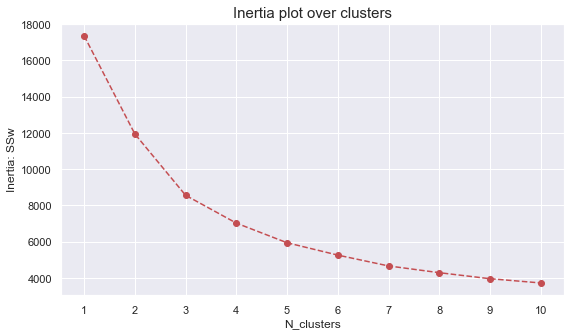

In [66]:
# Plotting the inertia to determine the number of clusters
plt.figure(figsize=(9,5))
# plt.plot(inertia)
x = range(1,11)
xi = list(range(len(x)))
y = inertia
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square')

plt.xlabel('N_clusters')
plt.ylabel('Inertia: SSw') 
plt.xticks(xi, x)
plt.title("Inertia plot over clusters", size=15)
plt.show()

*Silhouette Score*

For n_clusters = 2, the average silhouette_score is : 0.5877556089775121
For n_clusters = 3, the average silhouette_score is : 0.5552995911465793
For n_clusters = 4, the average silhouette_score is : 0.3847808391038883
For n_clusters = 5, the average silhouette_score is : 0.43879169037683147
For n_clusters = 6, the average silhouette_score is : 0.39258254551899496
For n_clusters = 7, the average silhouette_score is : 0.36798647336082324
For n_clusters = 8, the average silhouette_score is : 0.3090547908646061
For n_clusters = 9, the average silhouette_score is : 0.3110039373657426
For n_clusters = 10, the average silhouette_score is : 0.30531011119949836


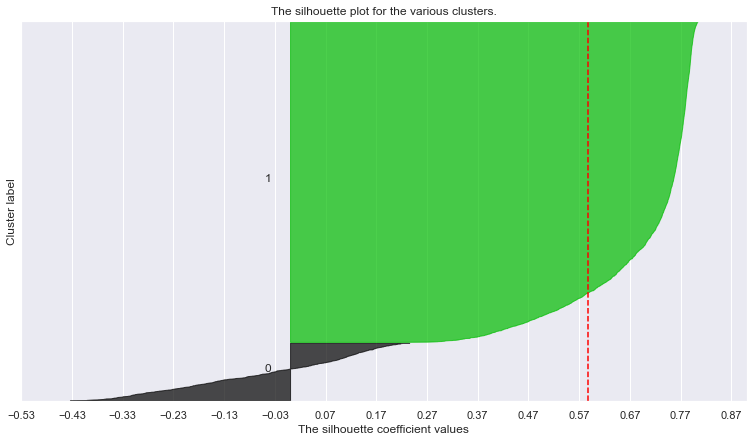

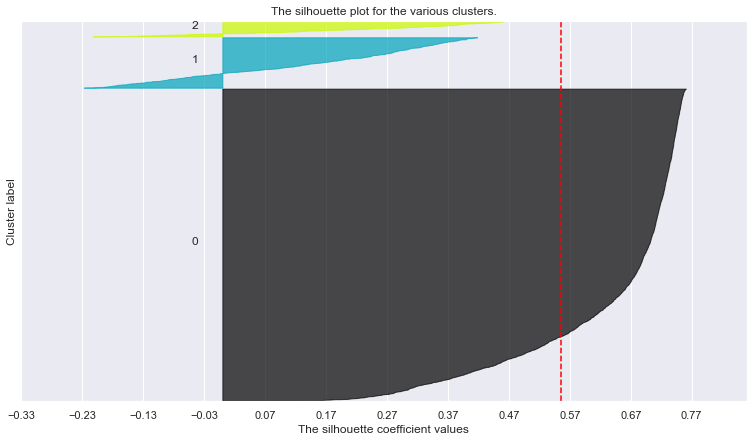

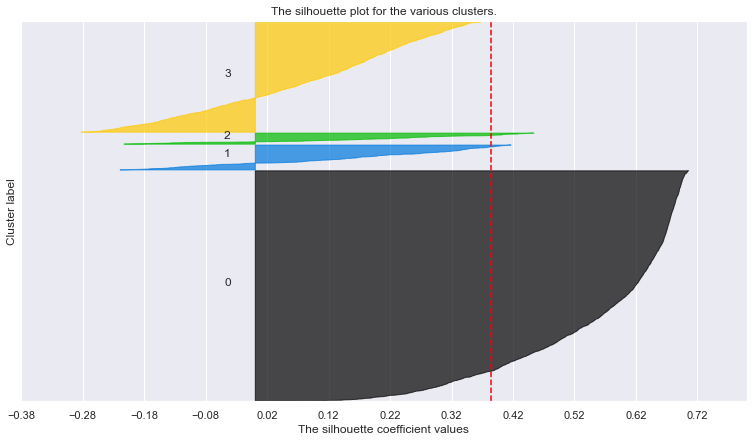

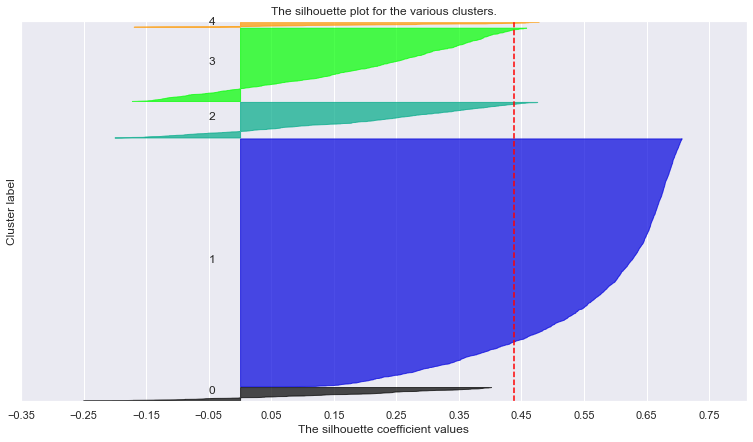

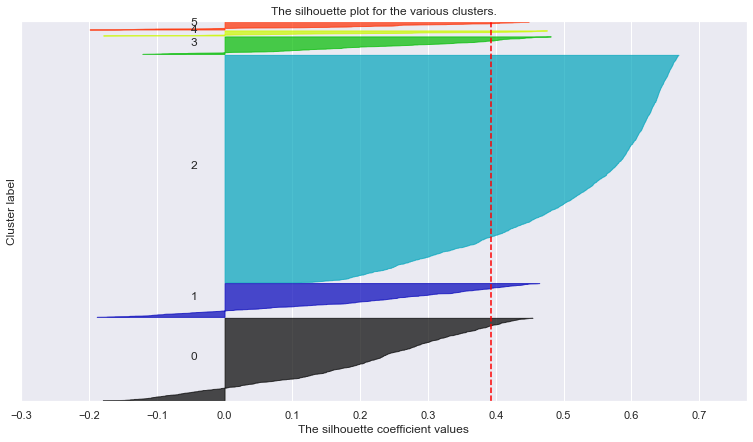

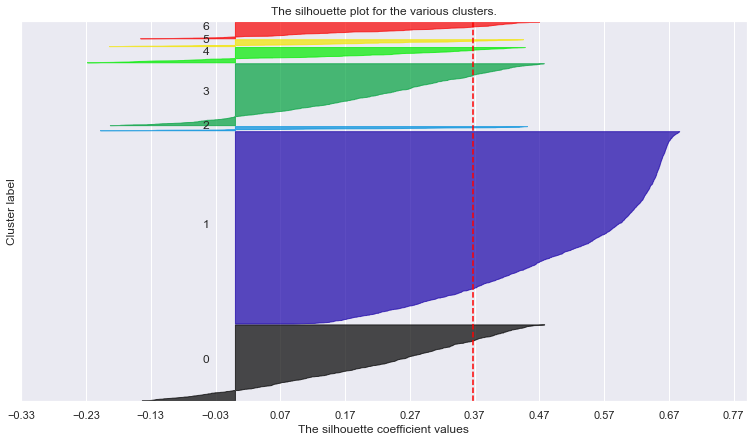

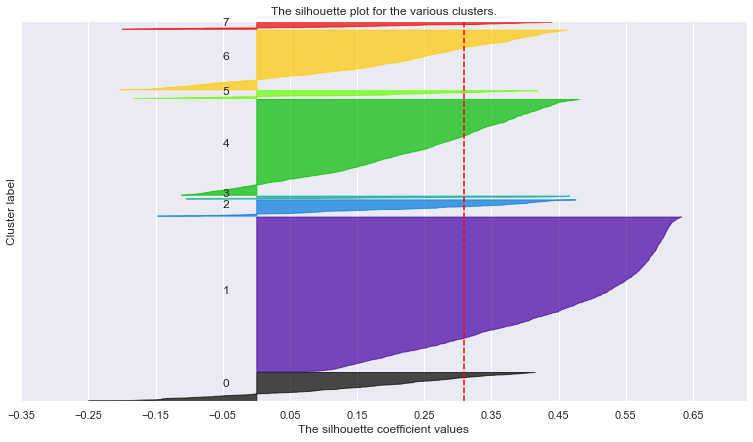

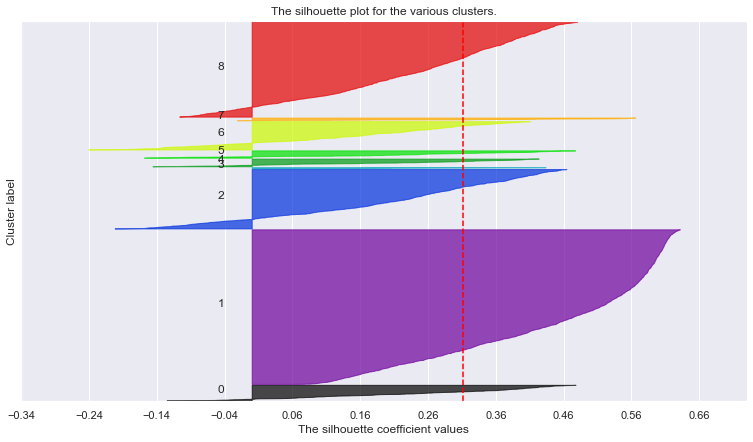

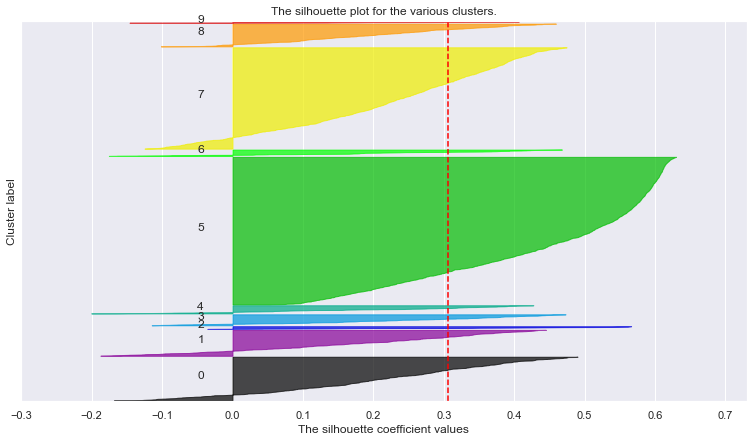

In [67]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_scaled[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_scaled[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

*Applying K-means for 3 clusters and vefifying the clusters profile*

In [68]:
# Customer Segmentation solution using K-means
number_clusters =  3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
labels_3 = kmclust.fit_predict(df_scaled[metric_features])
labels_3

array([2, 0, 0, ..., 0, 1, 0])

In [69]:
# Characterizing the 3-clusters solution
cluster3 = pd.concat((df_scaled[metric_features], pd.Series(labels_3, name='cluster_label')), axis=1)
cluster3.groupby('cluster_label').mean()

,frequency,distinct_items,items_per_transaction,avg_ticket
cluster_label,,,,
0,-0.279035,-0.309568,-0.185144,-0.204012
1,1.678785,1.760641,0.116500,0.192062
2,0.154342,0.521335,3.531332,3.672250


*Cluster Profile 3-cluster solution*

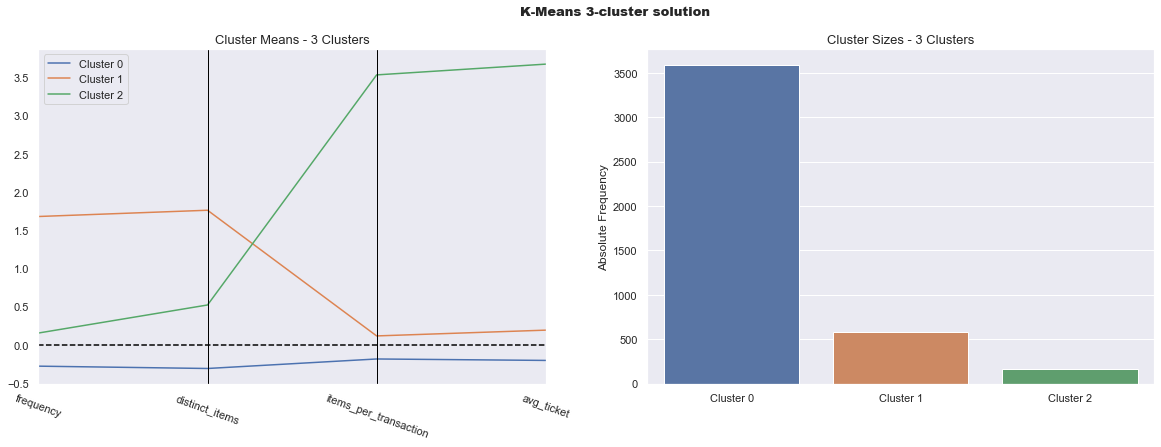

In [70]:
cluster_profiles(
    df = cluster3, 
    label_columns = ['cluster_label'], 
    figsize = (20, 6), 
    compar_titles = ["K-Means 3-cluster solution"]
)

*Applying K-means for 4 clusters and vefifying the clusters profile*

In [71]:
# Customer Segmentation solution using K-means
number_clusters =  4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
labels_4 = kmclust.fit_predict(df_scaled[metric_features])
labels_4

array([2, 3, 3, ..., 0, 1, 3])

In [72]:
# Characterizing the 4-clusters solution
cluster4 = pd.concat((df_scaled[metric_features], pd.Series(labels_4, name='cluster_label')), axis=1)
cluster4.groupby('cluster_label').mean()

,frequency,distinct_items,items_per_transaction,avg_ticket
cluster_label,,,,
0,-0.339464,-0.471893,-0.384161,-0.414712
1,2.679938,2.329812,0.072133,0.157470
2,0.235228,0.428200,4.068577,4.131507
3,0.080398,0.417187,0.377044,0.415314


*Cluster Profile 4-cluster solution*

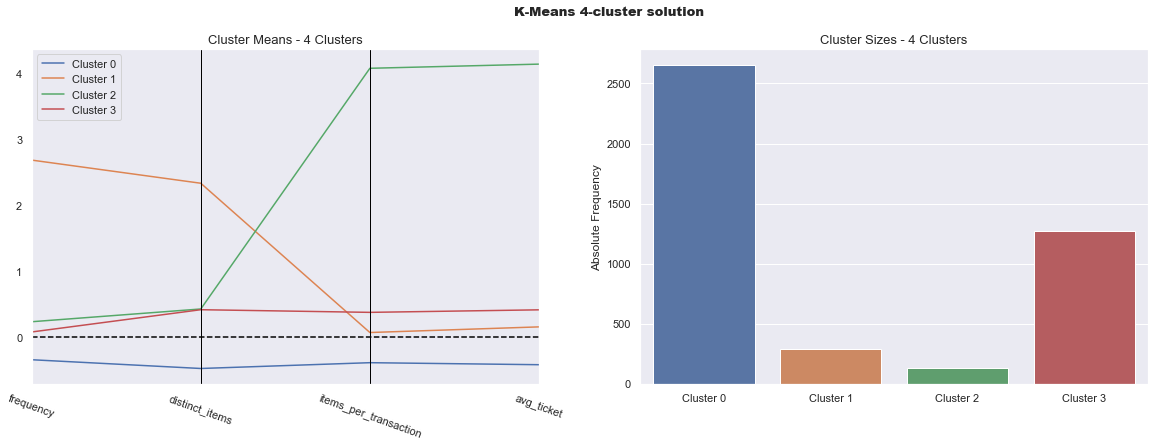

In [73]:
cluster_profiles(
    df = cluster4, 
    label_columns = ['cluster_label'], 
    figsize = (20, 6), 
    compar_titles = ["K-Means 4-cluster solution"]
)

*Analyzing average values for each of the 3-clusters*

In [74]:
#creating a copy of df original to analyze the average values of the features in the clusters
df_agg = df_seg.copy()

df_agg['cluster_label'] = cluster3['cluster_label']

df_agg.head()

,CustomerID,frequency,distinct_items,items_per_transaction,avg_ticket,cluster_label
0,12346.0,1,1,2500.0,2500.00,2
1,12347.0,7,103,351.0,615.71,0
2,12348.0,4,22,585.0,449.31,0
3,12349.0,1,73,631.0,1757.55,2
4,12350.0,1,17,197.0,334.40,0


In [75]:
# Calculate average values for each Clusters
cluster_agg = df_agg.groupby('cluster_label').agg({
    'frequency' : 'mean',
    'distinct_items': 'mean',
    'items_per_transaction': 'mean',
    'avg_ticket': 'mean',
    'CustomerID': 'count'
}).round(1)
# Print the aggregated dataset
print(cluster_agg)

               frequency  distinct_items  items_per_transaction  avg_ticket  \
cluster_label                                                                 
0                    2.6            38.4                  178.0       300.8   
1                   13.0           183.1                  254.5       433.7   
2                    4.9            96.4                 1120.9      1601.8   

               CustomerID  
cluster_label              
0                    3589  
1                     581  
2                     169  


*Using a **Radar Plot** for Dimensionality Visualization*

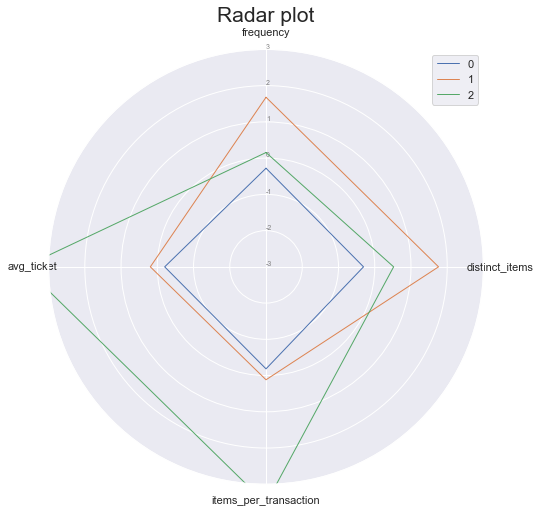

In [76]:
#creating list for the radar plot
merged_list = ['frequency','distinct_items','items_per_transaction','avg_ticket']

df = cluster3.groupby('cluster_label').mean()[merged_list]

plt.figure(figsize=(12,8))
N = len(merged_list)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], merged_list)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-3,-2,-1,0,1,2,3], ["-3","-2","-1","0","1","2","3"], color="grey", size=7)
plt.ylim(-3,3)
 
# Plot each individual 
for i in range(len(df)):
    values=df.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=i)

plt.title('Radar plot', fontsize=21)
plt.legend(loc='upper right')
plt.show()

### T-SNE

In [77]:
# This is step can be quite time consuming
two_dim = TSNE(n_components=2,perplexity=5, n_jobs=-1).fit_transform(cluster3[metric_features])

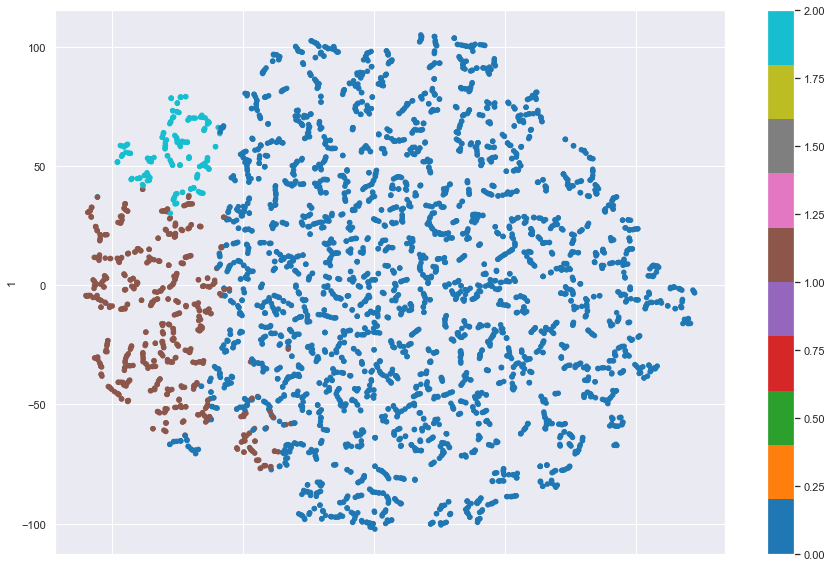

In [78]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=cluster3['cluster_label'], colormap='tab10', figsize=(15,10))
#plt.savefig(os.path.join('t-sne.png'), dpi=300)
plt.show()

<hr>
<a class="anchor" id="rules">
    
## 4.2 Association Rules
    
</a>

*As we have figured out, there are many of wholesales (resellers) within the customers, and to perform the association rules we are going to keep this customers initially out of the database to avoid a high influence of their purchase aspects*

In [79]:
#creating a copy of the dataset df_agg which stores the customer_id and the cluster_label
df_prep2 = df_agg[['CustomerID','cluster_label']].copy()
df_prep2.head(3)

,CustomerID,cluster_label
0,12346.0,2
1,12347.0,0
2,12348.0,0


*Repeating some steps of data preparation to prepare the Products and Orders Dataset without the Wholesales*

In [80]:
#checking the total customers present in the Cluster 0, which means the regular customers
print(df_prep2[df_prep2['cluster_label']==0.0].shape)

"""In this case we are going to leave out the cluster 1 and 2, this last represents the resellers customers"""

(3589, 2)


'In this case we are going to leave out the cluster 1 and 2, this last represents the resellers customers'

In [81]:
#keeping only the customers from Cluster 0 (3589 customers)
df_prep2 = df_prep2[df_prep2['cluster_label']==0.0].copy()

#renaming the column CustomerID to cust_id to facilitate the merge with prep2
df_prep2.rename(columns = {"CustomerID":"cust_id"}, inplace=True)

#checking first 5 rows
df_prep2.head()

,cust_id,cluster_label
1,12347.0,0
2,12348.0,0
4,12350.0,0
5,12352.0,0
6,12353.0,0


In [82]:
#re-using the df_prep1 which was prepared to create the Orders and Products datasets originally
#converting the customer_id to string 
df_prep1['CustomerID'] = df_prep1['CustomerID'].apply(str)
df_prep1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,_85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,_71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,_84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


*merging df1 and df2 using CustomerID*

In [83]:
#merging df1 and df2 using CustomerID
new_df = pd.merge(df_prep1, df_prep2, left_on='CustomerID', right_on='cust_id', how='left').drop('cust_id', axis=1)
print(new_df.shape)
new_df.head()

(531167, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_label
0,536365,_85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,NaN
1,536365,_71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
2,536365,_84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,NaN
3,536365,_84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
4,536365,_84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN


In [84]:
#Keeping only the Orders in which we can identify the Cluster_Label = 0 (Regular Customers)
new_df = new_df[new_df['cluster_label']==0.0].copy()
print("Total of rows: ",new_df.shape)
new_df.head(2)

Total of rows:  (165766, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_label
46,536371,_22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,0.0
65,536374,_21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom,0.0


In [85]:
# DataFrame for building the recommendation system
orders = new_df[['InvoiceNo', 'StockCode']].copy()
orders.head(5)

,InvoiceNo,StockCode
46,536371,_22086
65,536374,_21258
105,536380,_22961
141,536382,_10002
142,536382,_21912


In [86]:
orders.head(5)

,InvoiceNo,StockCode
46,536371,_22086
65,536374,_21258
105,536380,_22961
141,536382,_10002
142,536382,_21912


*Using group by to assign a list of items (StockCode) into each InvoiceNo*

In [87]:
def string_list(x):
    return [str(i) for i in x]

orders = orders.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()
orders.head()

,InvoiceNo,StockCode
0,536371,[_22086]
1,536374,[_21258]
2,536380,[_22961]
3,536382,"[_10002, _21912, _21832, _22411, _22379, _2238..."
4,536384,"[_82484, _84755, _22464, _21324, _22457, _2246..."


In [88]:
#checking general information about Orders dataset
print("shape", orders.shape)
print("missing values", orders.isnull().sum())
print(orders.dtypes)
orders.head(2)

shape (9340, 2)
missing values InvoiceNo    0
StockCode    0
dtype: int64
InvoiceNo    object
StockCode    object
dtype: object


,InvoiceNo,StockCode
0,536371,[_22086]
1,536374,[_21258]


*Using TransactionEncoder from mlxtend to apply an one-hot-encoded over Orders dataframe*

In [89]:
te = TransactionEncoder()

te.fit(orders['StockCode'])
orders_encoded = te.transform(orders['StockCode'])

In [90]:
orders_enc = pd.DataFrame(orders_encoded, columns =te.columns_)
orders_enc.head()

,_10002,_10080,_10120,_10123C,_10124A,_10124G,_10125,_10133,_10135,_11001,...,_90214U,_90214V,_90214W,_90214Y,_90214Z,_BANK CHARGES,_C2,_M,_PADS,_POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Apriori**<br>
*Using Apriori model to calculate the support metric for each itemset*

- *Using minimum support of 0.01, which means that any itemset returned by the model will have occurred in at least 1% of the orders in the store*
 - In case you have problems running the notebook, it is also possible to use lower combinations in the Apriori algorithmn, just adding the parameter "low_memory" = True. Unfortunatelly, by doing this the amount of itemsets would decrease.

In [91]:
#assigning the outputs into a dataframe named apriori
apriori_itemsets = apriori(orders_enc, min_support=0.01, verbose=1, use_colnames=True)#max_len=2,low_memory = True

Processing 255530 combinations | Sampling itemset size 2

MemoryError: Unable to allocate 1.11 GiB for an array with shape (9340, 127765) and data type bool

In [ ]:
apriori_itemsets.head()

In [ ]:
# counting and Seeing the distribution of the number of products on the combination
apriori_itemsets['length'] = apriori_itemsets['itemsets'].apply(lambda x: len(x))
apriori_itemsets['length'].value_counts()

In [ ]:
# calculating the metrics for all the combinations found above
rulesLift2 = association_rules(apriori_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=False, inplace=True)

<hr>
<a class="anchor" id="complementary">
    
### 4.2.1 Complementary Products
    
</a>

In [ ]:
# Find all the possible combination of complementary products using lift higher than 2
comp_prod=rulesLift2.loc[(rulesLift2.lift > 2)]
comp_prod

In [ ]:
# Organize the complementary products by confidence
comp_prod.sort_values("confidence", ascending = False, inplace = True)

In [ ]:
# counting and Seeing the distribution of the number of products of the antecedents products
comp_prod['length'] = comp_prod['antecedents'].apply(lambda x: len(x))
comp_prod['length'].value_counts()

In [ ]:
comp_prod.groupby('length').median()

In [ ]:
# counting and Seeing the distribution of the number of products of the consequents products
comp_prod['length_conse'] = comp_prod['consequents'].apply(lambda x: len(x))
comp_prod['length_conse'].value_counts()

In [ ]:
# Create a dataframe with the length of the number of products of the antecedents and consequents products
v1=pd.DataFrame(comp_prod['length'].value_counts())
v2= pd.DataFrame(comp_prod['length_conse'].value_counts())
ante_conseq= pd.concat((v1, v2), axis=1)
ante_conseq.rename(columns =\
{'length' : 'Length of antecedent products','length_conse':'Length of consequents products'}, inplace = True)

In [ ]:
# Ploting the Graphic of the dataframe above
length_prod = list(ante_conseq.index)
data = [
    go.Bar(x=length_prod, y=ante_conseq['Length of antecedent products'], \
    text=ante_conseq['Length of antecedent products'], \
    name='Antecedent products',\
     marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )),
    
    
    go.Bar(x=length_prod, y=ante_conseq['Length of consequents products'],\
    text= ante_conseq['Length of consequents products'],name='Consequents products',\
    
   marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)))
 
]

# Add titles and color the font of the titles to match that of the traces
y1 = go.YAxis(title='Frequency of occurrence', titlefont=go.Font(color='red'))


# # update second y axis to be position appropriately
# y2.update(overlaying='y', side='right')

# Add the pre-defined formatting for both y axes 
layout = go.Layout(yaxis1 = y1)



fig = go.Figure(data=data, layout=layout)
# Change the bar mode
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',xaxis_title='Length of products',\
                  )
fig.update_layout(height=550, width=900)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

*From the result of the graphic above we decided on using only atencedents with 1 products since is the one which apears the most on the combination*

In [ ]:
#using only the first level combinations
rulesConfidence = comp_prod.loc[(comp_prod.length == 1)]
rulesConfidence

In [ ]:
# Sort the database above using the lift
rulesConfidence.sort_values("lift", ascending = False, inplace = True)

*Plotting the top 10 combinations of complementary products*

In [ ]:
### Plot a basic network graph of the top 10 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:10]
fig = plt.figure(figsize=(15, 10)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=70, node_color="red", pos=nx.spring_layout(G), width= 5,arrows=True, arrowstyle= '-|>', arrowsize= 12)
nx.DiGraph(directed=True)

plt.axis('equal')

plt.show()

*Creating a function to retrieve the consequent itemsets from a given antecedent itemset according to the association rule*

In [ ]:
def recommender(antecedent, rules, max_results= 5):
    
    # get the rules for this antecedent
    prediction = rules[rules['antecedents'] == antecedent]
    
    # converting a frozen set with one element to string
    prediction = prediction['consequents'].apply(iter).apply(next)
    
    return prediction[:max_results].reset_index(drop=True)

In [ ]:
#creating a copy of the main rules dataset to test the complementary rules
complementary_rules = rulesConfidence.copy()

*Testing the Recommender System*

In [ ]:
print(products['_85123A'])

In [ ]:
recommendation = recommender({'_85123A'}, complementary_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

In [ ]:
print(products['_22423'])

In [ ]:
recommendation = recommender({'_22423'}, complementary_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

In [ ]:
print(products['_22579'])

In [ ]:
recommendation = recommender({'_22579'}, complementary_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

<hr>
<a class="anchor" id="subistitute">
    
### 4.2.2 Substitute Products
    
</a>

In [ ]:
#creating new itemsets for substitute products recommendation
substitute_itemsets = apriori(orders_enc, min_support=0.015, verbose=1 , use_colnames=True) #low_memory=True

In [ ]:
substitute_itemsets = apriori_itemsets.copy()

In [ ]:
# counting and Seeing the distribution of the number of products on the combination
substitute_itemsets['length'] = substitute_itemsets['itemsets'].apply(lambda x: len(x))
substitute_itemsets['length'].value_counts()

In [ ]:
# calculating the metrics for all the combinations found above
rulesLift3 = association_rules(substitute_itemsets, metric="lift", min_threshold=0.0)
rulesLift3.sort_values(by='lift', ascending=False, inplace=True)

In [ ]:
# Find all the possible combination of complementary products using lift higher than 1
sub_prod=rulesLift3.loc[(rulesLift3.lift < 2)]
sub_prod.shape

In [ ]:
# counting and Seeing the distribution of the number of products of the antecedents products
sub_prod['length'] = sub_prod['antecedents'].apply(lambda x: len(x))
sub_prod['length'].value_counts()

In [ ]:
#using only the first level combinations
rules_sub = sub_prod.loc[(sub_prod.length == 1)]

In [ ]:
# Sort the database above using the lift
rules_sub.sort_values("lift", ascending = False, inplace = True)

*Plotting the combinations of substitute products Considering a Lift less than 2*

In [ ]:
### Plot a basic network graph of the top 10 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rules_sub.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:10]
fig = plt.figure(figsize=(15, 10)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=70, node_color="red", pos=nx.spring_layout(G), width= 5,arrows=True, arrowstyle= '-|>', arrowsize= 12)
nx.DiGraph(directed=True)

plt.axis('equal')

plt.show()

*Testing the Recommender System for the Subtitute Produts*

In [ ]:
#creating a copy of the main rules dataset to test the complementary rules
substitute_rules = rules_sub.copy()

In [ ]:
print(products['_85123A'])

In [ ]:
recommendation = recommender({'_85123A'}, substitute_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

In [ ]:
print(products['_22423'])

In [ ]:
recommendation = recommender({'_22423'}, substitute_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

In [ ]:
print(products['_22579'])

In [ ]:
recommendation = recommender({'_22579'}, substitute_rules)

#iterating in recommendation to show the item descriptions
for stockid in recommendation:  
    print(products[stockid])

<hr>
<a class="anchor" id="deploy">
    
# 5.0 Deploy
    
</a>

**The deploye is going to be composed of 6 different lists, whose are going to be focused on each of different steps on the customer journey along the purchase path. The lists are:**
- Often Bought Together
- You may also be interested in
- Based on your Location
- Based on your last purchase    
- Based on Similar Customers (cluster)
- Top products of the Month

<hr>
<a class="anchor" id="together">
    
## 5.1 Often Bought Together
    
</a>

In [ ]:
often_together_deploy = complementary_rules[['antecedents','consequents']].copy()

#rename items to facilitate deploy
often_together_deploy.rename(columns = {"antecedents":"input_item", "consequents":"output_item"}, inplace=True)

#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

often_together_deploy = often_together_deploy.groupby('input_item')['output_item'].apply(list).reset_index()


often_together_deploy

<hr>
<a class="anchor" id="also">
    
## 5.2 You may also be interested in
    
</a>

In [ ]:
also_interested_deploy = substitute_rules[['antecedents','consequents']].copy()

#rename items to facilitate deploy
also_interested_deploy.rename(columns = {"antecedents":"input_item", "consequents":"output_item"}, inplace=True)

#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

also_interested_deploy = also_interested_deploy.groupby('input_item')['output_item'].apply(list).reset_index()


also_interested_deploy

<hr>
<a class="anchor" id="location">
    
## 5.3 Based on your Location
    
</a>

In [ ]:
#creating a copy of the prepared dataset
location = df_cust.copy()

#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

location_deploy = location.groupby('Country')['StockCode'].apply(list).reset_index()

#rename items to facilitate deploy
location_deploy.rename(columns = {"Country":"input_country", "StockCode":"output_item"}, inplace=True)

location_deploy.head()

<hr>
<a class="anchor" id="last">
    
## 5.4 Based on your last purchase
    
</a>

In [ ]:
#creating a copy of the prepared dataset
customers = df_cust.copy()

#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

last_purchase_deploy = customers.groupby('CustomerID')['StockCode'].apply(list).reset_index()

#rename items to facilitate deploy
last_purchase_deploy.rename(columns = {"CustomerID":"input_customer", "StockCode":"output_item"}, inplace=True)

last_purchase_deploy.head()

<hr>
<a class="anchor" id="similar">
    
## 5.5 Based on Similar Customers (Cluster)
    
</a>

In [ ]:
similar_customers = pd.concat([df_cust, cluster3], axis = 1)


#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

similar_customers_deploy = similar_customers.groupby('cluster_label')['StockCode'].apply(list).reset_index()

#rename items to facilitate deploy
similar_customers_deploy.rename(columns = {"cluster_label":"input_cluster_id", "StockCode":"output_item"}, inplace=True)

similar_customers_deploy.head()

<hr>
<a class="anchor" id="month">
    
## 5.6 Top products of the Month
    
</a>

In [ ]:
monthly_products = df_cust.copy()


#function to store items within a group
def string_list(x):
    return [str(i) for i in x]

monthly_products_deploy = monthly_products.groupby('month')['StockCode'].apply(list).reset_index()

#rename items to facilitate deploy
monthly_products_deploy.rename(columns = {"month":"input_month_id", "StockCode":"output_item"}, inplace=True)

monthly_products_deploy.head()

**The End**